### Add the toolbox to your system's path to allow importing!

In [1]:
import sys
sys.path.append('/home2/loganf/SecondYear/Functions/CML/')

# Event Structure

#### Key Code: get_sub_events(subject, experiment)

The toolbox is built around event structures which are structures that contain your behavioral data that can be used to retrieve the associated EEG data. Typically this is done using TimeSeriesX objects which build off of xarray, pandas and numpy arrays

### 1. Load an event structure for one pyFR Subject

In [2]:
from GetData import get_sub_events # Relevant import statement
print(help(get_sub_events)) # let's see the docstrings
events = get_sub_events(subject='BW022', experiment='pyFR')

/home2/loganf/anaconda3/envs/py3/lib/python3.5/site-packages/ptsa/extensions/edf/__init__.py:6: UserWarning: edffile extension module not found
  warnings.warn("edffile extension module not found", UserWarning)


Help on function get_sub_events in module GetData:

get_sub_events(subject, experiment)
    Returns a single subjects event structures using BaseEventReader from ptsa
    -----
    INPUTS:
    subjects: str, subject_id e.g. 'R1111M'
    experiment: str, experiment, e.g. 'FR1', 'pyFR' the prefix of 'RAM_'
                in front of any ram experiment, e.g. 'RAM_FR1' will load the
                matlab path

None


### 2. This will create the variable events into the workspace

In [3]:
print(events.shape, type((events)))
events[:3]

((517,), <class 'numpy.recarray'>)


rec.array([ (u'BW022', 1, 1, u'TRIAL', u'X', -999, -999, -999,   1.10839853e+12, 0, -999, -999, u'/data/eeg/BW022/eeg.noreref/BW022_14Feb05_1114', 269758),
           (u'BW022', 1, 1, u'ORIENT', u'X', -999, -999, -999,   1.10839853e+12, 1, -999, -999, u'/data/eeg/BW022/eeg.noreref/BW022_14Feb05_1114', 269764),
           (u'BW022', 1, 1, u'WORD', u'PARK',  179,    1,    0,   1.10839854e+12, 1, -999, -999, u'/data/eeg/BW022/eeg.noreref/BW022_14Feb05_1114', 270368)], 
          dtype=[('subject', '<U256'), ('session', '<i8'), ('list', '<i8'), ('type', '<U256'), ('item', '<U256'), ('itemno', '<i8'), ('serialpos', '<i8'), ('recalled', '<i8'), ('mstime', '<f8'), ('msoffset', '<i8'), ('rectime', '<i8'), ('intrusion', '<i8'), ('eegfile', '<U256'), ('eegoffset', '<i8')])

### 3. The size of the events structure is equivalent to the total number of experimental events the participant completed. For BW022, that was 517 events. Therefore, every entry in the structure is a single event and all of the fields detail properties of that event.

### 4. As an example, the first recalled word has these properities:

In [4]:
events[events['type']=='REC_WORD'][0]

(u'BW022', 1, 1, u'REC_WORD', u'FISH', 96, -999, -999, 1108398600319.0, -999, 3609, 0, u'/data/eeg/BW022/eeg.noreref/BW022_14Feb05_1114', 286107)

### 5. Information on all of these fields are described in detail on the lab wiki
(see https://memory.psych.upenn.edu/InternalWiki/Format_of_RAM_Events_Structures). Briefly, this event is a recalled item, a word the participant saw on the screen and was instructed to remember and later recalled in a memory task.

### 6. For electrophysiological analysis, the eegfile and eegoffset fields are critical as they point to the raw EEG file that contains this event and when in that file this event occurs.

In [5]:
print('eegfile location: ', events.eegfile[0])
print('first eegoffset: ', events.eegoffset[0])

('eegfile location: ', u'/data/eeg/BW022/eeg.noreref/BW022_14Feb05_1114')
('first eegoffset: ', 269758)


### 7. Many users have complained to the author that they don't want to switch from matlab to python because of how ugly the record arrays look, if this is truly a concern for the user, the following code can be used to convert it to a pretty pandas dataframe

In [3]:
def to_pandas_df(events):
    """returns as a pandas dataframe"""
    import pandas as pd
    df = pd.DataFrame.from_records([event for event in events],
                                   columns = events.dtype.names)
    return df

### 8. By default get_subs will prioritize json over matlab, meaning if a subject has both a json file and a matlab file it will load the json file, and will only load the matlab file if there is an error somewhere in the json loading processing. If one desired for some reason to load the matlab file the following code can be used:

In [7]:
matlab_events = get_sub_events('R1111M', 'RAM_FR1')
matlab_events_df = to_pandas_df(matlab_events)
matlab_events_df[10:20] # Show events 10-20, remember python indexes at 0!

,subject,session,list,serialpos,type,item,itemno,recalled,mstime,msoffset,...,expVersion,stimLoc,stimAmp,stimAnode,stimAnodeTag,stimCathode,stimCathodeTag,stimList,eegfile,eegoffset
10,R1111M,0,-999,-999,PRACTICE_WORD,X,-999,-999,1.453499e+12,1,...,v_1.05,X,-999.0,-999.0,,-999.0,,-999,/data/eeg/R1111M/eeg.noreref/R1111M_FR1_0_22Ja...,46697
11,R1111M,0,-999,-999,PRACTICE_WORD,X,-999,-999,1.453499e+12,1,...,v_1.05,X,-999.0,-999.0,,-999.0,,-999,/data/eeg/R1111M/eeg.noreref/R1111M_FR1_0_22Ja...,47889
12,R1111M,0,-999,-999,PRACTICE_WORD,X,-999,-999,1.453499e+12,1,...,v_1.05,X,-999.0,-999.0,,-999.0,,-999,/data/eeg/R1111M/eeg.noreref/R1111M_FR1_0_22Ja...,49114
13,R1111M,0,-999,-999,PRACTICE_WORD,X,-999,-999,1.453499e+12,1,...,v_1.05,X,-999.0,-999.0,,-999.0,,-999,/data/eeg/R1111M/eeg.noreref/R1111M_FR1_0_22Ja...,50314
14,R1111M,0,-999,-999,PRACTICE_WORD,X,-999,-999,1.453499e+12,1,...,v_1.05,X,-999.0,-999.0,,-999.0,,-999,/data/eeg/R1111M/eeg.noreref/R1111M_FR1_0_22Ja...,51614
15,R1111M,0,-999,-999,PRACTICE_WORD,X,-999,-999,1.453499e+12,1,...,v_1.05,X,-999.0,-999.0,,-999.0,,-999,/data/eeg/R1111M/eeg.noreref/R1111M_FR1_0_22Ja...,52881
16,R1111M,0,-999,-999,PRACTICE_DISTRACT_START,X,-999,-999,1.453499e+12,0,...,v_1.05,X,-999.0,-999.0,,-999.0,,-999,/data/eeg/R1111M/eeg.noreref/R1111M_FR1_0_22Ja...,53689
17,R1111M,0,-999,-999,PRACTICE_DISTRACT_END,X,-999,-999,1.453499e+12,0,...,v_1.05,X,-999.0,-999.0,,-999.0,,-999,/data/eeg/R1111M/eeg.noreref/R1111M_FR1_0_22Ja...,67383
18,R1111M,0,-999,-999,PRACTICE_REC_START,X,-999,-999,1.453499e+12,1,...,v_1.05,X,-999.0,-999.0,,-999.0,,-999,/data/eeg/R1111M/eeg.noreref/R1111M_FR1_0_22Ja...,67676
19,R1111M,0,-999,-999,PRACTICE_REC_END,X,-999,-999,1.453499e+12,1,...,v_1.05,X,-999.0,-999.0,,-999.0,,-999,/data/eeg/R1111M/eeg.noreref/R1111M_FR1_0_22Ja...,82932


In [8]:
json_events = get_sub_events('R1111M', 'FR1')
json_events_df = to_pandas_df(json_events)
json_events_df[10:20]

,session,eegoffset,protocol,intrusion,item_name,serialpos,rectime,stim_params,list,subject,...,montage,experiment,recalled,msoffset,stim_list,item_num,mstime,is_stim,type,exp_version
10,1,54458,r1,-999,RING,7,-999,[],-1,R1111M,...,0.0,FR1,0,1,0,-1,1453589775785,0,PRACTICE_WORD,1.05
11,1,55642,r1,-999,WAGON,8,-999,[],-1,R1111M,...,0.0,FR1,0,1,0,-1,1453589778154,0,PRACTICE_WORD,1.05
12,1,56900,r1,-999,TONGUE,9,-999,[],-1,R1111M,...,0.0,FR1,0,1,0,-1,1453589780670,0,PRACTICE_WORD,1.05
13,1,58193,r1,-999,IRON,10,-999,[],-1,R1111M,...,0.0,FR1,0,1,0,-1,1453589783255,0,PRACTICE_WORD,1.05
14,1,59467,r1,-999,FLOOD,11,-999,[],-1,R1111M,...,0.0,FR1,0,1,0,-1,1453589785804,0,PRACTICE_WORD,1.05
15,1,60267,r1,-999,X,-999,-999,[],-1,R1111M,...,0.0,FR1,0,0,0,-999,1453589787405,0,PRACTICE_DISTRACT_START,1.05
16,1,70352,r1,-999,X,-999,-999,[],-1,R1111M,...,0.0,FR1,0,0,0,-999,1453589807575,0,PRACTICE_DISTRACT_END,1.05
17,1,70612,r1,-999,X,-999,-999,[],-1,R1111M,...,0.0,FR1,0,1,0,-999,1453589808095,0,PRACTICE_REC_START,1.05
18,1,85868,r1,-999,X,-999,-999,[],-1,R1111M,...,0.0,FR1,0,1,0,-999,1453589838609,0,PRACTICE_REC_END,1.05
19,1,96405,r1,-999,X,-999,-999,[],1,R1111M,...,0.0,FR1,0,0,0,-999,1453589859685,0,TRIAL,1.05


## Below needs to be ported to python

7. To create a vector of data from a particular event structure field, you can either use getStructField or square/curly braces. To use getStructField, you pass the events structure and the desired field. The output variable will be a vector of that data, e.g. a vector of 1s and 0s for recalled/not recalled items.
  recalls = getStructField(events,'recalled');
8. Alternatively, you can create a vector of data from a particular event structure field using square braces for integer values and curly braces for string values.
   recalls = [events.recalled];
   type = {events.type};
9. You can select subsets of events using the filterStruct.m function. filterStruct requires two inputs, an events structure which we’ve already loaded and a logical expression. As an example, to get all subsequently recalled events,
   recEvents = filterStruct(events,'recalled == 1');
To get all WORD events,
   wordEvents = filterStruct(events,'strcmp(type,''WORD'')')
10. Instead of filtering to a subset of events, you may want a logical index of 1s and 0s across all events. To do this, you can use the function inStruct.m. The results from this function will tell you for a certain logical expression, e.g. ‘recalled == 1’ whether that is true for every event (so it yields a binary vector with the length of the events structure). Sometimes people get errors when using filterStruct, which could be caused by empty fields.

# Subsequent Memory Effect

#### Key Code: get_sub_eeg(subject, experiment, events=None, reference='bipolar', eeg_start=-2., eeg_end=2., eeg_buffer=1.)
#### By default: 
1) No events are passed meaning that all events are loaded 

2) The reference is bipolar (pass in reference='monopolar' if global average monopolar referencing is desired)

3) The eeg is loaded from -2s to 2s relative to each event's start time with a 1s buffer

### 1. Load all EEG for a single Subject

In [4]:
from GetData import get_sub_eeg
print(help(get_sub_eeg))# Pull up the docstring!

Help on function get_sub_eeg in module GetData:

get_sub_eeg(subject, experiment, events=None, reference='bipolar', eeg_start=-2.0, eeg_end=2.0, eeg_buffer=1.0, exclude_bad=True)
    Returns a subjects EEG using ptsa's EEGReader
     -----
    INPUTS
    subjects: str, subject_id e.g. 'R1111M'
    experiment: str, experiment, e.g. 'FR1', 'pyFR' the prefix of 'RAM_'
                in front of any ram experiment, e.g. 'RAM_FR1' will load the
                matlab path
    events: np.recarray like, by default none will load all eeg, if passed will only
            load eeg corresponding to the events array
    reference: str, what kind of referencing system to load, by default 'bipolar',
               accepted arguments: 'bipolar', 'monopolar'
    eeg_start: float, by default -2., the time point relative to the event to start loading
    eeg_end: float, by default 2., the time point relative to the event to stop loading
    eeg_buffer: float, by default 1., the time to add on each side

In [ ]:
# Load all eeg
eeg = get_sub_eeg(subject = 'R1111M', experiment = 'FR1', reference='bipolar',
                  eeg_start = 0., eeg_end = 1.6, eeg_buffer = 0.)


### 2. If instead we only wanted to load a single sessions events or a single kind of events, we could pass in the argument events= event_array. This is useful because events are much quicker to manipulate than loading all of them into the eeg and then filtering. Below we will load only the encoding events of session 1

In [ ]:
# Load all events
events = get_sub_events(subject='R1111M', experiment = 'FR1')
# Select only encoding events from session 1
evs = events[(events['type']=='WORD') & (events['session']==1)]
# Load eeg for only session 1
eeg = get_sub_eeg(subject = 'R1111M', experiment = 'FR1', events=evs,
                  eeg_start = 0., eeg_end = 1.6, eeg_buffer = 0.)

### 3. Apply a butterworth filter to remove line noise (in america 60Hz, in europe 50Hz)

In [ ]:
from ptsa.data.filters import ButterworthFilter
b_filter = ButterworthFilter(time_series=eeg, 
                             freq_range=[58., 62.], 
                             filt_type='stop', order=4)
eeg = b_filter.filter()

### 4. Z-transform the data using timepoints selected every 60s +/- 10s across the whole session

#### Keycode: get_continous_eeg(subject, experiment, session)
#### Keycode: randomly_spaced_timepoints(eeg, start_time, end_time, random_range=10, step_in_seconds=60)
#### Keycode: DataChopper(*kwds) <- See below

In [5]:
from Stats.ZScoreFromWholeSession import get_continous_eeg, randomly_spaced_timepoints
from ptsa.data.filters import DataChopper
print(help(get_continous_eeg))
print('\n')
print(help(randomly_spaced_timepoints))
print('\n')
print(help(DataChopper))


Help on function get_continous_eeg in module Stats.ZScoreFromWholeSession:

get_continous_eeg(subject, experiment, session, channels=None, bipolar=True)
    Return a continous EEG recording for a session worth of data
    --------
    INPUTS:
    subject: str, represents the subject_id, e.g. 'R1111M'
    experiment: str, represents the experiment to analyze, e.g. 'FR1'
    session: int, the session on which to get the eeg
    channels: np.array like, the MONOPOLAR channels one wishes to get, by default all
    -------
    OUTPUTS:
    eeg: TimeSeriesX, a continous recording of eeg for the whole session
                     has dims = ('bipolar_pairs', 'start_offsets', 'time')

None


Help on function randomly_spaced_timepoints in module Stats.ZScoreFromWholeSession:

randomly_spaced_timepoints(eeg, start_time, end_time, random_range=10, step_in_seconds=60)
    Return randomly selected offset points for an inputted array
    ------
    INPUTS:
    eeg: TimeSeriesX, a continous session w

In [14]:
# First load in ALL off the session's data
continous_data = get_continous_eeg(subject='R1111M', experiment='FR1', session = 1)

# Generate randomly spaced timepoints
offsets = randomly_spaced_timepoints(eeg=continous_data, start_time=0., end_time = 1.6,
                                     random_range=10, step_in_seconds=60)

# Chop the data using the random offsets
dc = DataChopper(start_offsets=offsets, session_data=continous_data, 
                 start_time=0., end_time=1.6,buffer_time=1.0)
chopped = dc.filter()

# Since we're not doing any convolution we don't need the buffer
# Normally you'd just pass in buffer_time = 0.0, but it's helpful to know
# That you can remove buffers like this
chopped = chopped.remove_buffer(chopped.buffer_time)

# Create a mean and standard deviation from the whole session
mean = chopped.mean(dim='start_offsets').mean(dim='time')
standard_deviation = chopped.std(dim='start_offsets').mean(dim='time')

# Transpose the data so we can apply the mean and standard w/o a dim mismatch
eeg = eeg.transpose('events', 'time', 'bipolar_pairs')
z_eeg = (eeg[:,:,]-mean)/standard_deviation

### 5. Seperate subsequently forgotten and subsequently remembered words and make a plot

<IPython.core.display.Javascript object>


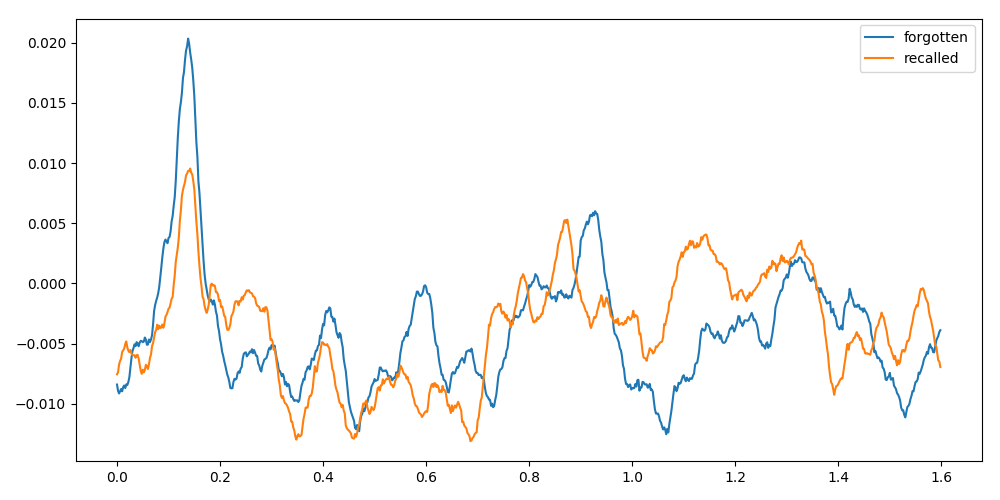

In [47]:
%matplotlib notebook
from matplotlib import pyplot as plt

# Set up the plot
fig, ax = plt.subplots(figsize=(10,5))

# Seperate events by  if they recalled it or not
forgotten = z_eeg.sel(events=z_eeg.events.data['recalled']==0)
recalled = z_eeg.sel(events=z_eeg.events.data['recalled']==1)

# Get mean forgotten and mean remembered across all events, channels
f = forgotten.mean('events').mean('bipolar_pairs')
r = recalled.mean('events').mean('bipolar_pairs')

# Plot!
plt.plot(z_eeg.time.data, f, label = 'forgotten')
plt.plot(z_eeg.time.data, r, label = 'recalled')

# Show the legend
ax.legend()
plt.tight_layout()
plt.show()

# <center> Demo interacting with Ram and PTSA and EEGToolbox </center>

### RAM Computational Pipeline
This tutorial demonstrates how to build Logistic Regression Classifier of Good memory for a single patient in 30 lines of code. The code is based on the refactored PTSA toolkit that uses xarray as a core container for the time series data. To construct classifier we will need two classes of objects:


Readers

Filters

Readers are objects that read data store on the hard drive. For the purpose of building memory classifiers we need the following readers:

BaseEventReader - an object that reads so called events files (stored in Matlab format)

TalReader - an object that reads the so called "Tal Structs" i.e. the information about pairing of bipolar electrodes, location of electrods specified in various coordinates systems and name of the brain areas where electrodes are placed.

EEGReader - and object that reads raw EEG for specified events and electrodes

We will use 3 filter objects:

MonopolarToBipolarFilter - an onbject that takes as an input monopolar time series (as returned by EEGReader) and returns another time series where for each bipolar pair we form a series that is difference of two monopolar time series as specified as given by the bipolar pair specification. For example, we may have 100 monopolar electrodes but the number of bipolar pairs wcould be 125 or so. MonopolarToBipolarFilter will transform an input time series corresponding witj monopolar data to the one corresponding to bipolar data

ButterworthFiler - an object that applies Butterworth filter along time axis of the series. For example our time series can be represented by a 3-dimensional array with dimensions "bipolar_pairs", "events" and "time"and in this case ButterworthFilter will do filtering along "time" dimension

MorletWaveletFilter - an object that takes as an input a time series, applies continuous wavelet convolution along time axis and returns another time series of wavelet coeeficients (represented as power and phase arrays). For example our time series can be represented by a 3-dimensional array with dimensions "bipolar_pairs", "events" and "time" and in this case MoreletWaveletFilter would return 4-dimensional array of wavelet coeeficients (power, phase) with dimensions being frequency, "bipolar_pairs", "events" and "time", where frequency is center wavelet frequency.

First let us start by importing modules/classes that we will need in our computational pipeline:

In [16]:
import sys
import numpy.testing 
import numpy as np
from ptsa.data.readers import BaseEventReader
from ptsa.data.readers.TalReader import TalReader
from ptsa.data.readers import EEGReader
from ptsa.data.filters import MonopolarToBipolarMapper
from ptsa.data.filters import ButterworthFilter
from ptsa.data.filters.MorletWaveletFilter import MorletWaveletFilter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.stats.mstats import zscore
from time import time
import os

### 1. Load Event Data

In [17]:
subject = 'R1111M'
exp = 'FR1'

# ------------------- READING EVENTS
base_events = get_sub_events(subject, exp)
base_events = base_events[base_events.type == 'WORD']

### 2. Load EEG data

In [23]:
monopolar_eeg = get_sub_eeg(subject=subject, experiment = exp, events=base_events, 
                            reference = 'monopolar', eeg_start=0., eeg_end=1.6, eeg_buffer=1.0)

bipolar_eeg = get_sub_eeg(subject=subject, experiment = exp, events=base_events, 
                          reference = 'bipolar', eeg_start=0., eeg_end=1.6, eeg_buffer=1.0)

### 3. Verify that monopolar -> bipolar filtering was done correctly

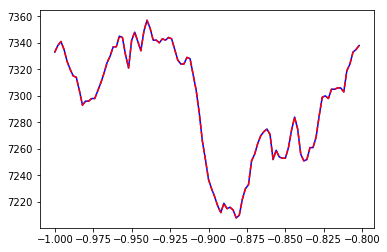

In [26]:
first_bp = bipolar_eeg[0,0,:]
second_bp = bipolar_eeg[1,0,:]

first_bp_manual = monopolar_eeg[0,0,:]-monopolar_eeg[1,0,:]
second_bp_manual = monopolar_eeg[0,0,:]-monopolar_eeg[8,0,:]

np.testing.assert_array_equal(first_bp_manual, first_bp)
np.testing.assert_array_equal(second_bp_manual, second_bp)

plt.plot(first_bp['time'][0:100], first_bp[0:100],'b')
plt.plot(first_bp_manual['time'][0:100], first_bp_manual[0:100],'r--')

As you can see the action of the MonopolarToBipolarMapper matches our "manual" computations so at this point we are ready to filter out unwanted frequencies from our bipolar EEG spectrum. We will Apply ButterworthFilter to supporess signal components in the 58 -62 Hz bandwidth:

In [27]:
#Apply ButterworthFilter to remove signal components in 58-62Hz
b_filter = ButterworthFilter(time_series=bipolar_eeg, freq_range=[58., 62.], 
                             filt_type='stop', order=4)
bp_eegs_filtered = b_filter.filter()

Now we are ready to compute wavelet coefficients for our filtered time series of bipolar EEG data. To do that we will use object called MorletWaveltFilter that takes as its constructor parameters time_series object for which we compute wavelets, an array of center wavelet frequencies - freqs (here we are using 8 frequencies that are logaritmically-spacedbetween 3 and 180 Hz) and optional parameter that specifies the return value - here we return power so the output parameter has value 'power' . To allow rudimentary benchmarking of the code we will measure time it takes for the MorletWaveletFilter to carry out its computations. Notice that the filter() function of the MorletWaveletFilter returns two objects - power and phase arrays. Since we are requesting power coeeficients only the phase array will be set to None.

In [28]:
s = time()
wf = MorletWaveletFilter(time_series=bp_eegs_filtered,
                         freqs=np.logspace(np.log10(3), np.log10(180), 8),
                         output='power'                   
                         )

pow_wavelet, phase_wavelet = wf.filter()
print 'TOTAL WAVELET TIME=', time()-s

('total time wavelet loop: ', 222.25957083702087)
TOTAL WAVELET TIME= 222.270047903


Now that we have wavelets computted we will remove buffer to truncate those segments of time series for which wavelet convolution is "contaminated" by so called edge effects. We will also tak logarithm of the powers to handle the fact that spectral powers in the EEG signals show power-law decay with increasing frequencies

In [29]:
pow_wavelet = pow_wavelet.remove_buffer(duration=1.0)
np.log10(pow_wavelet.data, out=pow_wavelet.data);

For the subsequent analysis we will need to reorder the axes of the wavelet power array and compute the mean power across encoding epoch as follows:

In [30]:
pow_wavelet = pow_wavelet.transpose("events","bipolar_pairs","frequency","time")
mean_powers_nd = pow_wavelet.mean(skipna=True,axis=-1)

In [31]:
a = np.arange(12).reshape(3,4)
print a
a_z = zscore(a, axis=0, ddof=1)
a_z

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[-1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.]])

Once we computed mean powers we are essentially ready to compute classifier, but first we will normalize features (i.e. mean power for each combination of bipolar pair and spectral freqnency) accross the events we will use to train the classifier. As a first step however we will reshape mean_powers_nd array (with dimensions events, bipolar_pair, frequency) to a 2-D array where one axis will correspond to events and the other one will be a Cartesian product of bipolar_pair and frequency axes:

In [32]:
mean_powers_rs = mean_powers_nd.data.reshape(mean_powers_nd.data.shape[0],-1)

first axis of mean_powers_nd corresponds to events and the second one corresponds to Cartesian product of bipolar_pair and frequency axes of the mean_powers_nd. At this point we are ready to z-score along axis the first axis (axis with index 0 since we number axes starting from 0 in Python) :

In [33]:
zscore_mean_powers = zscore(mean_powers_rs, axis=0, ddof=1)

In [34]:
print(zscore_mean_powers)

[[-1.91693354 -0.52356911 -0.49182165 ..., -1.75118268 -1.36462355
  -0.11498746]
 [-0.26718101  0.1459354   1.70491493 ..., -1.04715025 -0.32914546
  -0.60125053]
 [ 2.03447104  0.61856508  0.51044202 ..., -0.41302451 -0.43812397
  -0.70770282]
 ..., 
 [ 0.80106252 -0.05958818 -0.65227765 ..., -0.0317476  -0.43256113
  -0.8516289 ]
 [-0.69439572 -0.8074528   0.17807984 ..., -0.90261483 -0.4898147
   0.44389501]
 [-1.01986587 -0.80533344 -1.37458074 ..., -0.78290898  0.03349096
  -0.40827408]]


In [35]:
#check how many FR1 sessions we have in data
np.unique(base_events.session)

array([0, 1, 2, 3])


We have 3 sessions so for the purpose of this tutorial we will use session 0 and 1 as training data and session 2 as a test data Let's first construct mask arrays that we will use to perform selection along axis corresponding to events. in essence the masking or selector array, if you will, is a Boolean array that has number of elements equal to the number of events. So when e.g. 20th element of this array is True and 22nd is False the selection along events axis will pick 20th element but discard 22nd. IN the code below we are constructing selector arrays for training and validation sessions and use this array to select events and zscored powers for training and validation sessions

In [36]:
sess_min = 0
sess_max = 1
validation_sess_min = 2
validation_sess_max = 2

evs = base_events
# ----------------------- computting training and validation session mask arrays to facilitate event selection
training_session_mask =(evs.session>=sess_min) &(evs.session<=sess_max)  
validation_session_mask =(evs.session>=validation_sess_min) &(evs.session<=validation_sess_max)  



# --------------- selecting training events
evs_sel = evs[training_session_mask]
# ---------- converting recalled field of the events into integer array (recalled items are 1's and non-recalled are 0s)
recalls_array = evs_sel.recalled.astype(np.int)
# --------------- selecting zscored powers for training data
training_data = zscore_mean_powers[training_session_mask,...]

# --------------- selecting validation events (out session data)
evs_val = evs[validation_session_mask]
# --------------- selecting zscored powers for out session data
validation_data = zscore_mean_powers[validation_session_mask,...]
# ---------- converting recalled field of the events into integer array for out session data
validation_recalls_array = evs_val.recalled.astype(np.int)


Now, we will construct LogisticRegression object that will fit logistic regression coefficients for classifier features (i.e., zscored mean powers for each combination of bipoar pair and frequency):

In [37]:
lr_classifier = LogisticRegression(C=7.2e-4, penalty='l2', class_weight='balanced', solver='liblinear') #c=7.2e-4
lr_classifier.fit(training_data, recalls_array)

LogisticRegression(C=0.00072, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


Once we have the coeeficients we can calculate AUC for the training data.

In [38]:
recall_prob_array = lr_classifier.predict_proba(training_data)[:,1]
auc = roc_auc_score(recalls_array, recall_prob_array)
print auc

0.831736464358


We can also plot ROC curve (false positives rate (FPR) vs. true positives rate (TPR) ) for in-session (aka training) data

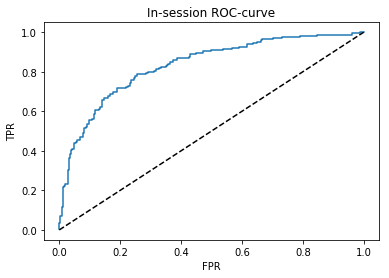

In [39]:
roc_curve_data_in = roc_curve(recalls_array,recall_prob_array)
fpr_in = roc_curve_data_in[0]
tpr_in = roc_curve_data_in[1]
plt.plot(fpr_in,tpr_in)
plt.plot((0.0,1.0),(0.,1.),'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('In-session ROC-curve')


However to asses real value of the classifier wee need to test it on the data differennt than the training data (out-session data). We already have validation dataset solet's use it to compute out-session AUC and ROC curve:

In [40]:
validation_recall_prob_array = lr_classifier.predict_proba(validation_data)[:,1]
validation_auc = roc_auc_score(validation_recalls_array, validation_recall_prob_array)
validation_auc

0.71083138464600226

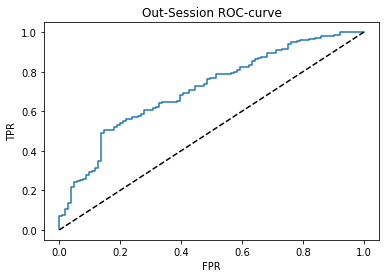

In [41]:
roc_curve_data_out = roc_curve(validation_recalls_array, validation_recall_prob_array)
fpr_out = roc_curve_data_out[0]
tpr_out = roc_curve_data_out[1]
plt.plot(fpr_out,tpr_out)
plt.plot((0.0,1.0),(0.,1.),'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Out-Session ROC-curve')

Notice that in our example we used entire data set (training + x-validation) during z-scoring. In real applications we will have training data set which we will z-score and then then we will compute z-score for the training dataset separately (possibly using variance estimate for the training set). However in order to keep this tutorial relatively simple i made simplifying assumption and zscored entire data set.

For logistic regression classifier we estimate probabilities that a given event belongs to a a class of recalled events. The probability formula is given by:
$P(x)=\left({1+e^{-\left(B+\sum w_i x_i\right)}}\right)^{-1}$
which implies that we are looking for a dividing hyperplane that will separate recalled and non-recalled events. The equation of this hyperplane is simply
$B+\sum w_i x_i = 0$
where $B$ is the intercept and $w_i$'s are weights coefficients fitted by Logistic Regression algorithm. $x_i$'s are features of the classifier - in our case $x_i$'s denote mean powers for the i-th combination of spectral frequency and bipolar pair. While ROC and AUC can give you a sense of classifier performance, sometimes it is nice to be able to visualize how well the dividing hyperplane separates data points belonging to thtw two classes (here recalled vs non recalled) We can do it by projecting N dimensional space into two dimennsions and plot dividing plane as well as individual , color-coded events. Let's rewrite $B+\sum w_i x_i = 0$ as
$ B+X+Y = 0 $ where $X = \sum_{i=0}^{i=200} w_i x_i$ and $Y = \sum_{i=201}^{i=N} w_i x_i$. The number 200 is arbitrary here. The idea is that we can treat a weighted sum of first n features as one variable and the weighted sum of the remaining features as another variable and plot those on a scatter plot. Here I picked $n=200$ and $N$ denotes total number of features. Since $ B+X+Y = 0 $ is the exponent in the logistic probability function the line along which the probability of the data point belonging to either class is exactly 0.5 is called dividing line. It is not hard to see that the equation of hte dividing line is exactly  $ B+X+Y = 0 $ because when the exponent is $0$ then
$P(x)=\left({1+e^{-0}}\right)^{-1}=0.5$
Now, the data points that lie above the dividing line will get assigned high probability (here, of being recalled) and those that lie below will get assigned low probability

In [42]:
w_tmp = np.squeeze(lr_classifier.coef_)

In [43]:
w=np.zeros(len(w_tmp)+1)
w[0]=lr_classifier.intercept_
w[1:]=w_tmp

In [44]:
x_project=np.dot(training_data[:,:200],w[1:201])
y_project=np.dot(training_data[:,200:],w[201:])
recalled_ind = recalls_array==0

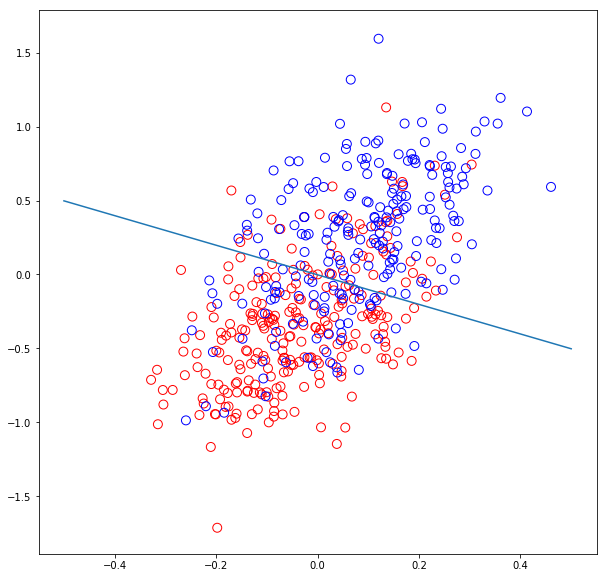

In [45]:
fig = plt.figure(figsize=(10, 10))

# plt.plot(x_line, y_line)
# plt.ylabel('uniform sample')
x = np.linspace(-.5,.5)
plt.plot(x, -w[0]-x)
plt.scatter(x=x_project[recalled_ind], y=y_project[recalled_ind], s=80, facecolors='none', edgecolors='r')
plt.scatter(x=x_project[~recalled_ind], y=y_project[~recalled_ind], s=80, facecolors='none', edgecolors='b')

The analogous plot for the validation data would look as follows

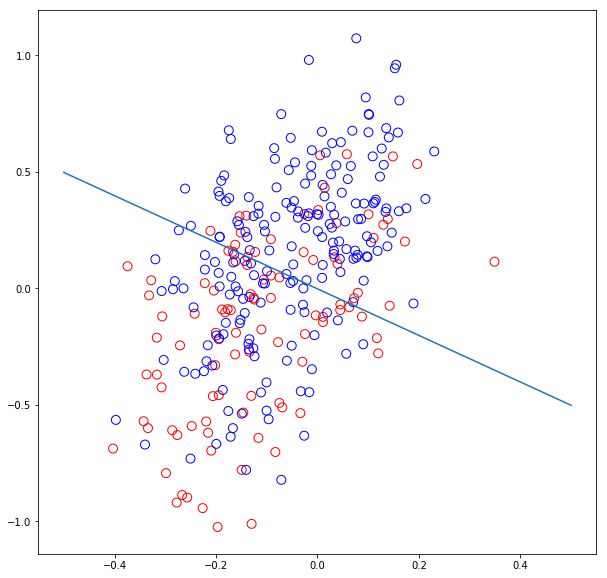

In [46]:
x_project_val=np.dot(validation_data[:,:200],w[1:201])
y_project_val=np.dot(validation_data[:,200:],w[201:])
validation_recalled_ind = validation_recalls_array==0
fig = plt.figure(figsize=(10, 10))

# plt.plot(x_line, y_line)
# plt.ylabel('uniform sample')
x = np.linspace(-.5,.5)
plt.plot(x, -w[0]-x)
plt.scatter(x=x_project_val[validation_recalled_ind], y=y_project_val[validation_recalled_ind], s=80, facecolors='none', edgecolors='r')
plt.scatter(x=x_project_val[~validation_recalled_ind], y=y_project_val[~validation_recalled_ind], s=80, facecolors='none', edgecolors='b')